# Battleship AI Analysis

In [1]:
from game_physics import * 
from game_variables import Settings as s

import pandas as pd
import numpy as np
import seaborn as sns
import random 

import warnings
warnings.filterwarnings('ignore')

In [29]:

def run_simulation(iterations, grid_size, fleet, strategy_1, strategy_0):
    player_1_wins = 0       
    player_0_wins = 0
    result = pd.DataFrame(columns=['test', 'player_1_win','player_0_win', 'miss', 'steps'])
    
    s.set_grid_size = grid_size
    s.set_fleet = fleet
    
    for i in range(iterations):
    
        game = Game(False,False)
        
        
        strategy = [game.random_strategy, game.sequential_strategy, game.mcts ]
        player_1_strategy = strategy[strategy_1]
        player_0_strategy = strategy[strategy_0]

        while not game.game_over_state:

            index = player_1_strategy() if game.turn else player_0_strategy()
            r = game.move(index)
            if r == -1: game.game_over_state = True  

        iteration_result = {
            'test' : i,
            'player_1_win' : 1 if game.winner == "Player 1" else 0,
            'player_0_win' : 1 if game.winner == "Player 2" else 0,
            'steps' : game.total_hits + game.total_miss,
            'miss' : game.total_miss
        }

        result = result.append( iteration_result, ignore_index = True)

        if game.turn:
            player_1_wins += 1
        if not game.turn: 
            player_0_wins += 1 
            
        print(f"SUCCESS: Test {i+1}/{iterations} for grid size {grid_size}. Winner: {game.winner},",end='\r', flush=True)

    print('\n')
    return result

In [37]:
'''
Use following codes for different strategies
0 : Random
1 : Sequential
2 : MCTS
'''


test_runs = 100
test_grid_sizes = [5,7,10,20]
test_fleet_sizes = [[2,3,4], [2,3,3,4], [2,3,3,4,5], [2,3,3,4,4,5]]
sim_results = pd.DataFrame(columns=['test', 'grid', 'player_1_wins', 'player_0_wins', 'avg_steps','avg_miss'])


for t, i in enumerate(zip(test_grid_sizes,test_fleet_sizes)):
    r = run_simulation(test_runs, i[0],i[1], 1, 2)
    sim_r = {
        'test' : t,
        'grid' : i[0],
        'player_1_wins' : r.player_1_win.astype(bool).sum(axis=0),
        'player_0_wins' : r.player_0_win.astype(bool).sum(axis=0),
        'avg_steps' : r.steps.mean(),
        'avg_miss' : r.miss.mean()
    }
    
    sim_results = sim_results.append(sim_r,ignore_index=True)
    
    
print(f"Simulation Complete. Ran {test_runs} iterations each for {t+1} test case ")
    



SUCCESS: Test 100/100 for grid size 5. Winner: Player 2,

SUCCESS: Test 100/100 for grid size 7. Winner: Player 2,

SUCCESS: Test 100/100 for grid size 10. Winner: Player 2,

SUCCESS: Test 100/100 for grid size 20. Winner: Player 2,

Simulation Complete. Ran 100 iterations each for 4 test case 


In [36]:
r

,test,player_1_win,player_0_win,miss,steps
0,0,0,1,5,17
1,1,0,1,9,21
2,2,0,1,4,16
3,3,0,1,5,17
4,4,0,1,6,18
5,5,0,1,8,20
6,6,0,1,4,16
7,7,1,0,7,19
8,8,1,0,5,17
9,9,0,1,6,18


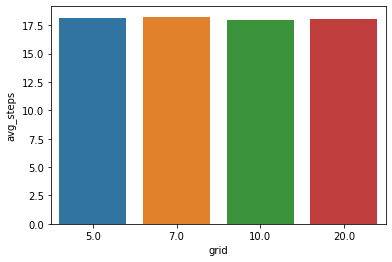

In [38]:
sns.barplot(x=sim_results.grid, y=sim_results.avg_steps)

In [39]:
sim_results

,test,grid,player_1_wins,player_0_wins,avg_steps,avg_miss
0,0.0,5.0,7.0,93.0,18.15,6.15
1,1.0,7.0,13.0,87.0,18.25,6.25
2,2.0,10.0,5.0,95.0,17.98,5.98
3,3.0,20.0,5.0,95.0,18.01,6.01


In [8]:
r = run_simulation(20,5,[2,3,4], 1,2)


Running test 20/20 for grid size 5



In [11]:
r

,test,player_1_win,player_0_winmiss,steps,miss,player_0_win
0,0,0,NaN,18,6.0,0.0
1,1,0,NaN,16,4.0,0.0
2,2,0,NaN,19,7.0,0.0
3,3,0,NaN,14,2.0,0.0
4,4,0,NaN,19,7.0,0.0
5,5,0,NaN,13,1.0,0.0
6,6,0,NaN,19,7.0,0.0
7,7,0,NaN,19,7.0,0.0
8,8,0,NaN,21,9.0,0.0
9,9,0,NaN,20,8.0,0.0
